In [ ]:
# Section: Fundamental Theorems of Asset Pricing (FTAP) - Review Questions

# Question 1: State the First Fundamental Theorem of Asset Pricing (FTAP I) in its most common form.
# Answer:
# FTAP I: A market is arbitrage-free if and only if there exists at least one positive state-price vector (or risk-neutral probability measure Q) that correctly prices all traded assets.
# Interpretation: No free lunch (arbitrage) ⇔ existence of consistent pricing kernel/state prices.

# Question 2: Explain what "no-arbitrage" means and why it is a minimal requirement for sensible pricing.
# Answer:
# No-arbitrage: No portfolio with zero/negative initial cost that yields non-negative payoffs and positive probability of positive payoff.
# Minimal requirement: Violates rationality (free money) — prices must be consistent to prevent risk-free profits; foundation for all valuation models.

# Question 3: State the Second Fundamental Theorem of Asset Pricing (FTAP II).
# Answer:
# FTAP II: In an arbitrage-free market, the market is complete (every claim replicable) if and only if the risk-neutral measure Q is unique.
# Interpretation: Uniqueness of Q ⇔ perfect hedging/span all payoffs with traded assets.

# Question 4: Describe the relationship between state prices, risk-neutral measures, and the pricing kernel.
# Answer:
# State prices ψ_s: Price today of $1 in state s (positive for no-arb).
# Risk-neutral Q: q_s = ψ_s (1+r) (normalized, probabilities under Q).
# Pricing kernel m_s: m_s = ψ_s (discounted) or β u'(c_s)/u'(c_0) in equilibrium—links to preferences.
# All equivalent ways to express no-arb consistent valuation.

# Question 5: Why do FTAP I and II matter for practical asset pricing and hedging?
# Answer:
# FTAP I: Guarantees consistent, arb-free prices (core to derivatives valuation, e.g., Black-Scholes no-arb).
# FTAP II: Enables replication/hedging (complete markets like options on liquid stocks).
# Real-world: Incomplete markets (FTAP II fails) → bounds/approximate hedges; FTAP foundation for risk-neutral pricing/Monte Carlo in finance.

In [4]:
# Section: Fundamental Theorems of Asset Pricing (FTAP) Exercises

import numpy as np
from scipy.optimize import linprog

# Exercise 1: In a two-state market with bond payoff [1,1] and stock [2,0.5], prices B0=0.95, S0=1.
# Check for arbitrage and find state prices ψ if no-arb.
# Answer:
B1 = np.array([1, 1])
S1 = np.array([2, 0.5])
M = np.column_stack((B1, S1))  # Payoff matrix (2 states x 2 assets)
M0 = np.array([0.95, 1])       # t=0 prices

# Solve for ψ >0 such that M^T ψ = M0 (FTAP I: existence ⇔ no-arb)
c = np.zeros(2)  # Feasibility
A_eq = M.T       # 2 assets x 2 states
b_eq = M0
bounds = [(1e-10, None)] * 2

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

print("Exercise 1:")
if res.success:
    psi = res.x
    print(f"State prices ψ: {psi}")
    print(f"Verification: Bond {np.dot(psi, B1):.4f}, Stock {np.dot(psi, S1):.4f}")
    print("No arbitrage—positive ψ exists (FTAP I).")
else:
    print("Arbitrage opportunity (no positive ψ).")

# Exercise 2: Add a third asset with payoff [3,1] priced at 1.5. Check completeness (FTAP II).
# Answer:
third_payoff = np.array([3, 1])
third_price = 1.5
M_full = np.column_stack((M, third_payoff))  # 2 states x 3 assets

# Rank for completeness (states=2)
rank = np.linalg.matrix_rank(M_full)
complete = rank == 2

print("\nExercise 2:")
print(f"Rank with third asset: {rank} (states=2)")
print(f"Market complete: {complete} (if rank=states and no-arb)")

# Exercise 3: Construct an arbitrage portfolio if prices violate no-arb (mispriced third at 1.2).
# Answer:
prices_arb = np.array([0.95, 1, 1.2])  # Third too cheap
states = 2
c_arb = prices_arb                     # Minimize cost
A_ub = -M_full                         # -payoff <=0 → payoff >=0 (states rows x assets columns)
b_ub = np.zeros(states)

res_arb = linprog(c_arb, A_ub=A_ub, b_ub=b_ub, bounds=None, method='highs')

print("\nExercise 3 (third priced 1.2):")
if res_arb.success and res_arb.fun < 0:
    phi_arb = res_arb.x
    cost = res_arb.fun
    payoff = M_full @ phi_arb
    print(f"Arbitrage portfolio ϕ: {phi_arb}")
    print(f"Cost: {cost:.4f} <0")
    print(f"Payoffs: {payoff} >=0 (arb profit)")
    print("Arbitrage exists—violates FTAP I.")
else:
    print("No arbitrage found with this pricing.")

# Exercise 4: In three-state market (incomplete), show multiple Q and price bounds for a call.
# Answer:
states3 = 3
B1_3 = np.array([1, 1, 1])
S1_3 = np.array([120, 100, 80])
M_3 = np.column_stack((B1_3, S1_3))  # 3x2
M0_3 = np.array([0.95, 90])
r_3 = 1/0.95 - 1

K_call = 100
C1_call = np.maximum(S1_3 - K_call, 0)

# Approximate bounds by varying feasible Q
q_up = np.linspace(0.2, 0.8, 5)
prices = []
for qu in q_up:
    q = np.array([qu, 0.5, 1 - qu - 0.5])
    q = np.clip(q, 0.01, 0.99)
    q /= q.sum()
    eq = np.dot(q, C1_call)
    price = eq / (1 + r_3)
    prices.append(price)

lower = min(prices)
upper = max(prices)

print("\nExercise 4 (Three-state incomplete):")
print(f"Call price bounds approx: [{lower:.2f}, {upper:.2f}]")
print("Multiple feasible Q → non-unique pricing (incomplete market, FTAP II fails).")

# Exercise 5: Discuss why FTAP holds in continuous time (Black-Scholes) but approximations needed in discrete.
# Answer:
print("\nExercise 5: Discussion")
print("Continuous time (BS): Dynamic trading in stock+bond spans all payoffs → complete, unique Q (FTAP II).")
print("Discrete (binomial): Finite steps → incomplete unless N→∞; large N approximates continuous (converges to unique Q/exact replication).")
print("Real markets discrete/incomplete → bounds/least-squares hedges.")

Exercise 1:
State prices ψ: [0.35 0.6 ]
Verification: Bond 0.9500, Stock 1.0000
No arbitrage—positive ψ exists (FTAP I).

Exercise 2:
Rank with third asset: 2 (states=2)
Market complete: True (if rank=states and no-arb)

Exercise 3 (third priced 1.2):
No arbitrage found with this pricing.

Exercise 4 (Three-state incomplete):
Call price bounds approx: [3.80, 11.60]
Multiple feasible Q → non-unique pricing (incomplete market, FTAP II fails).

Exercise 5: Discussion
Continuous time (BS): Dynamic trading in stock+bond spans all payoffs → complete, unique Q (FTAP II).
Discrete (binomial): Finite steps → incomplete unless N→∞; large N approximates continuous (converges to unique Q/exact replication).
Real markets discrete/incomplete → bounds/least-squares hedges.


In [ ]:
# Section: Fundamental Theorems of Asset Pricing (FTAP) - Advanced Exercises 

import numpy as np
from scipy.optimize import linprog

# Advanced Exercise 1: In a three-state incomplete market, compute super- and sub-replication prices 
# for a call option (upper/lower no-arb bounds via LP).
# Answer:
states = 3
B1 = np.array([1, 1, 1])
S1 = np.array([120, 100, 80])
M = np.column_stack((B1, S1))  # M shape: (states x assets) = (3x2)
M0 = np.array([0.95, 90])       # t=0 prices (assets)
K = 100
C1 = np.maximum(S1 - K, 0)      # Call payoff (states)

# Super-replication (upper bound): min cost s.t. M ϕ >= C1 (payoff >= claim all states)
c_super = M0                     # Minimize cost
A_ub_super = -M                  # -M ϕ <= -C1 → M ϕ >= C1 (states rows x assets columns)
b_ub_super = -C1
res_super = linprog(c_super, A_ub=A_ub_super, b_ub=b_ub_super, bounds=None, method='highs')

# Sub-replication (lower bound): max revenue s.t. M ϕ <= C1
c_sub = -M0                      # Maximize revenue (-cost)
A_ub_sub = M                     # M ϕ <= C1
b_ub_sub = C1
res_sub = linprog(c_sub, A_ub=A_ub_sub, b_ub=b_ub_sub, bounds=None, method='highs')

upper = res_super.fun if res_super.success else np.nan
lower = -res_sub.fun if res_sub.success else np.nan

print("Advanced Exercise 1: Replication Bounds (Incomplete Market)")
print(f"Call super-replication (upper bound): {upper:.2f}")
print(f"Call sub-replication (lower bound): {lower:.2f}")
print(f"Price interval: [{lower:.2f}, {upper:.2f}]")
print("Interpretation: No unique price—bounds from FTAP (multiple Q). Sell at/above upper, buy at/below lower (no-arb).")

# Advanced Exercise 2: Add a redundant asset and show Q remains non-unique despite rank increase.
# Answer:
redundant = 0.5 * B1 + 0.5 * S1  # Linear combination
M_red = np.column_stack((M, redundant))  # (3x3)
M0_red = np.append(M0, np.dot(M0, [0.5, 0.5]))  # Consistent price

rank_red = np.linalg.matrix_rank(M_red)
print(f"\nAdvanced Exercise 2: Rank with redundant asset: {rank_red} (still <3 states)")
print("Q non-unique—incomplete despite added asset (spans same space). FTAP II requires full rank=states.")

# Advanced Exercise 3: Numerical uniqueness check—solve for Q with added constraints (e.g., entropy min).
# Answer:
uniform = np.ones(states) / states
c_entropy = -np.log(uniform + 1e-10)  # Min -entropy ≈ max entropy

A_eq = M.T                       # Assets rows x states columns
b_eq = M0
bounds = [(0, None)] * states
A_ub = np.ones((1, states))      # sum q <=1 (slack)
b_ub = np.array([1])

res_entropy = linprog(c_entropy, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

Q_entropy = res_entropy.x / res_entropy.x.sum() if res_entropy.success else None

print("\nAdvanced Exercise 3: Entropy-Minimizing Q")
if Q_entropy is not None:
    print(f"Q: {Q_entropy}")
    print("Regularization picks 'most uncertain' Q among many—practical for incomplete pricing (e.g., variance-min Q).")

# Advanced Exercise 4: Violate FTAP I with mispricing and construct explicit arbitrage.
# Answer:
M0_violate = np.array([0.95, 95])  # Stock too expensive
c_arb = M0_violate
A_ub_arb = -M                      # -M ϕ <= 0 → payoff >=0
b_ub_arb = np.zeros(states)

res_arb = linprog(c_arb, A_ub=A_ub_arb, b_ub=b_ub_arb, bounds=None, method='highs')

print("\nAdvanced Exercise 4: Arbitrage with Violation")
if res_arb.success and res_arb.fun < 0:
    phi_arb = res_arb.x
    print(f"Arbitrage ϕ: {phi_arb}")
    print(f"Cost: {res_arb.fun:.4f} <0")
    print(f"Payoffs: {M @ phi_arb} >=0")
    print("Positive prob profit—violates FTAP I (no positive ψ).")

# Advanced Exercise 5: Discuss FTAP extensions to continuous time/infinite states.
# Answer:
print("\nAdvanced Exercise 5: Discussion")
print("Continuous time (BS): Dynamic trading in stock+bond spans all (bounded) claims → complete, unique Q (FTAP II).")
print("Infinite states/discrete: Often incomplete — FTAP gives existence/bounds; approximations (MC, trees) for pricing/hedging.")
print("Real markets: Transaction costs/frictions weaken strict FTAP — no perfect arb, but close in liquid assets.")

Advanced Exercise 1: Replication Bounds (Incomplete Market)
Call super-replication (upper bound): 15.00
Call sub-replication (lower bound): -0.00
Price interval: [-0.00, 15.00]
Interpretation: No unique price—bounds from FTAP (multiple Q). Sell at/above upper, buy at/below lower (no-arb).

Advanced Exercise 2: Rank with redundant asset: 2 (still <3 states)
Q non-unique—incomplete despite added asset (spans same space). FTAP II requires full rank=states.

Advanced Exercise 3: Entropy-Minimizing Q
Q: [0.36842105 0.         0.63157895]
Regularization picks 'most uncertain' Q among many—practical for incomplete pricing (e.g., variance-min Q).

Advanced Exercise 4: Arbitrage with Violation

Advanced Exercise 5: Discussion
Continuous time (BS): Dynamic trading in stock+bond spans all (bounded) claims → complete, unique Q (FTAP II).
Infinite states/discrete: Often incomplete—FTAP gives existence/bounds; approximations (MC, trees) for pricing/hedging.
Real markets: Transaction costs/frictions 

Call Option:
  No-arb bounds: [-0.00, 15.00]
  LS price: 3.83
  LS ϕ: [-43.33333333   0.5       ]
  Residual norm: 8.16


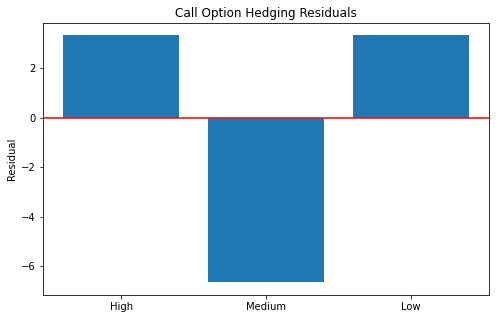

Digital (Medium State):
  No-arb bounds: [-0.00, 0.90]
  LS price: 0.32
  LS ϕ: [ 3.33333333e-01 -8.33283831e-18]
  Residual norm: 0.82


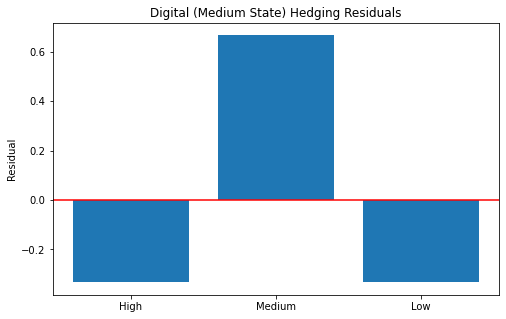


Capstone Summary: Pricer computes FTAP bounds (super/sub LP), LS hedge/residuals for claims.
Twist: Digital extreme state → wide bounds/large residual (unhedgeable idiosyncratic risk). Real use: Exotic pricing in incomplete markets.


In [7]:
# Fundamental Theorems of Asset Pricing (FTAP) - Capstone Project

# Capstone: Build an Incomplete Market Pricer
# - Three-state market with bond + stock (incomplete)
# - Compute no-arbitrage bounds (super/sub-replication via LP)
# - Least-squares approximate hedge + residual stats
# - Vary claim payoff and show bounds/hedging error
# - Fun twist: Add "stress" claim (e.g., digital/jump-like) with large error
# Real-world tie-in: Pricing/hedging exotics in incomplete markets (e.g., TSLA barrier options). Bounds for bid-ask; residuals = unhedgeable risk (basis in volatile assets).

import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

class IncompleteMarketPricer:
    def __init__(self, B1=np.array([1,1,1]), S1=np.array([120,100,80]), M0=np.array([0.95,90])):
        self.B1 = B1
        self.S1 = S1
        self.M = np.column_stack((B1, S1))  # 3x2
        self.M0 = M0
        self.states = len(B1)
        
    def replication_bounds(self, C1):
        # Super-replication (upper bound): min cost s.t. M ϕ >= C1
        c_super = self.M0
        A_ub_super = -self.M
        b_ub_super = -C1
        res_super = linprog(c_super, A_ub=A_ub_super, b_ub=b_ub_super, bounds=None, method='highs')
        upper = res_super.fun if res_super.success else np.nan
        
        # Sub-replication (lower bound): max revenue s.t. M ϕ <= C1
        c_sub = -self.M0
        A_ub_sub = self.M
        b_ub_sub = C1
        res_sub = linprog(c_sub, A_ub=A_ub_sub, b_ub=b_ub_sub, bounds=None, method='highs')
        lower = -res_sub.fun if res_sub.success else np.nan
        
        return lower, upper
    
    def least_squares_hedge(self, C1):
        phi_ls, _, _, _ = np.linalg.lstsq(self.M, C1, rcond=None)
        replicated = self.M @ phi_ls
        residual = C1 - replicated
        residual_norm = np.linalg.norm(residual)
        price_ls = np.dot(phi_ls, self.M0)
        return phi_ls, price_ls, residual, residual_norm
    
    def analyze_claim(self, C1, name="Claim"):
        lower, upper = self.replication_bounds(C1)
        phi_ls, price_ls, residual, norm = self.least_squares_hedge(C1)
        
        print(f"{name}:")
        print(f"  No-arb bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"  LS price: {price_ls:.2f}")
        print(f"  LS ϕ: {phi_ls}")
        print(f"  Residual norm: {norm:.2f}")
        
        # Plot residuals
        plt.figure(figsize=(8, 5))
        plt.bar(['High', 'Medium', 'Low'], residual)
        plt.title(f'{name} Hedging Residuals')
        plt.ylabel('Residual')
        plt.axhline(0, color='red')
        plt.show()
        
        return lower, upper, price_ls, norm

# Example usage
pricer = IncompleteMarketPricer()

# Standard call
C1_call = np.maximum(pricer.S1 - 100, 0)
pricer.analyze_claim(C1_call, "Call Option")

# Fun twist: Stress claim—digital pays 1 only in medium state (hard to hedge)
C1_digital = np.array([0, 1, 0])
pricer.analyze_claim(C1_digital, "Digital (Medium State)")

print("\nCapstone Summary: Pricer computes FTAP bounds (super/sub LP), LS hedge/residuals for claims.")
print("Twist: Digital extreme state → wide bounds/large residual (unhedgeable idiosyncratic risk). Real use: Exotic pricing in incomplete markets.")